**Importing the necessary library**

In [149]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [150]:
#import the dataset in the form of a pandas dataframe

try:
    df = pd.read_csv('C:/Users/patha/OneDrive - student.mes.ac.in/Documents/GitHub/Netflix movie data analysis using Python/mymoviedb.csv', engine='python', on_bad_lines='skip')
except FileNotFoundError:
    print("File not found. Please check the file path.")
except Exception as e:
    print(f"An error occurred: {e}")

df.head()


,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [151]:
# check the shape(rows, column) of the dataframe
df.shape

(9837, 9)

In [152]:
# info is used to get the information about the dataframe
# it will show the number of rows and columns, datatypes of each column, and memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9837 entries, 0 to 9836
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9837 non-null   object 
 1   Title              9828 non-null   object 
 2   Overview           9828 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   object 
 5   Vote_Average       9827 non-null   object 
 6   Original_Language  9827 non-null   object 
 7   Genre              9826 non-null   object 
 8   Poster_Url         9826 non-null   object 
dtypes: float64(1), object(8)
memory usage: 691.8+ KB


In [153]:
# Changing the data type of the 'release_date' column to datetime
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')
# Changing the data type of the 'Vote_Count' column to numeric
# This will convert the column to numeric, setting errors='coerce' will replace non-convertible values with NaN
df['Vote_Count'] = pd.to_numeric(df['Vote_Count'], errors='coerce')
# Changing the data type of the 'Vote_Average' column to numeric
df['Vote_Average']=pd.to_numeric(df['Vote_Average'], errors='coerce')

# Checking the data types of the columns after conversion
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9837 entries, 0 to 9836
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Release_Date       9827 non-null   datetime64[ns]
 1   Title              9828 non-null   object        
 2   Overview           9828 non-null   object        
 3   Popularity         9827 non-null   float64       
 4   Vote_Count         9826 non-null   float64       
 5   Vote_Average       9826 non-null   float64       
 6   Original_Language  9827 non-null   object        
 7   Genre              9826 non-null   object        
 8   Poster_Url         9826 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(5)
memory usage: 691.8+ KB


In [154]:
# To see the unque values in the 'Original_Language' column
unique_languages = df['Original_Language'].unique()
print(unique_languages)

# To see the unque values in the 'Genres' column
unique_genres = df['Genre'].unique()
print(unique_genres)

['en' 'ja' 'fr' 'hi' 'es' 'ru' 'de' 'th' 'ko' 'tr' 'cn' 'zh' 'it' 'pt'
 'ml' 'pl' 'fi' 'no' 'da' 'id' 'sv' None
 'https://image.tmdb.org/t/p/original/6iXYe7AkQ1QIfMFuvXsSCT2zF7s.jpg'
 'nl' 'te' 'sr' 'is' 'ro' 'tl' 'fa' 'uk' 'nb' 'eu' 'lv' 'ar' 'el' 'cs'
 'ms' 'bn' 'ca' 'la' 'ta' 'hu' 'he' 'et']
['Action, Adventure, Science Fiction' 'Crime, Mystery, Thriller'
 'Thriller' ... 'Comedy, TV Movie, Romance'
 'Science Fiction, Fantasy, Family, Music' 'War, Drama, Science Fiction']


In [155]:
# Drop the columns which are not useful for analysis
df.drop(['Poster_Url', 'Overview'], axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9837 entries, 0 to 9836
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Release_Date       9827 non-null   datetime64[ns]
 1   Title              9828 non-null   object        
 2   Popularity         9827 non-null   float64       
 3   Vote_Count         9826 non-null   float64       
 4   Vote_Average       9826 non-null   float64       
 5   Original_Language  9827 non-null   object        
 6   Genre              9826 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 538.1+ KB


In [156]:
# To remove the duplicate rows from the dataframe
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9829 entries, 0 to 9836
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Release_Date       9827 non-null   datetime64[ns]
 1   Title              9828 non-null   object        
 2   Popularity         9827 non-null   float64       
 3   Vote_Count         9826 non-null   float64       
 4   Vote_Average       9826 non-null   float64       
 5   Original_Language  9827 non-null   object        
 6   Genre              9826 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 614.3+ KB


In [157]:
# To check the null values in the dataframe
df.isnull().sum()

Release_Date         2
Title                1
Popularity           2
Vote_Count           3
Vote_Average         3
Original_Language    2
Genre                3
dtype: int64

In [158]:
# Fill 'Release_Date' with a placeholder date
df['Release_Date'].fillna(pd.Timestamp('1900-01-01'), inplace=True)

# Fill 'Title' with 'Unknown'
df['Title'].fillna('Unknown', inplace=True)

# Fill 'Popularity', 'Vote_Count', and 'Vote_Average' with 0
df['Popularity'].fillna(0, inplace=True)
df['Vote_Count'].fillna(0, inplace=True)
df['Vote_Average'].fillna(0, inplace=True)

# Fill 'Original_Language' with 'Unknown'
df['Original_Language'].fillna('Unknown', inplace=True)

# Fill 'Genre' with 'Unknown'
df['Genre'].fillna('Unknown', inplace=True)

C:\Users\patha\AppData\Local\Temp\ipykernel_12880\2710240643.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Release_Date'].fillna(pd.Timestamp('1900-01-01'), inplace=True)
C:\Users\patha\AppData\Local\Temp\ipykernel_12880\2710240643.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves 

In [159]:
# To check the null values in the dataframe after filling

df.isnull().sum()

Release_Date         0
Title                0
Popularity           0
Vote_Count           0
Vote_Average         0
Original_Language    0
Genre                0
dtype: int64

In [160]:
# split the strings into lists
df['Genre'] = df['Genre'].str.split(', ')
# explode the lists
df = df.explode('Genre').reset_index(drop=True)
print(df['Genre'].unique())
# check the shape(rows, column) of the dataframe after exploding
df.shape

['Action' 'Adventure' 'Science Fiction' 'Crime' 'Mystery' 'Thriller'
 'Animation' 'Comedy' 'Family' 'Fantasy' 'War' 'Horror' 'Drama' 'Music'
 'Romance' 'Western' 'History' 'TV Movie' 'Documentary' 'Unknown']


(25795, 7)

In [161]:
df

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre
0,2021-12-15,Spider-Man: No Way Home,5083.954,8940.0,8.3,en,Action
1,2021-12-15,Spider-Man: No Way Home,5083.954,8940.0,8.3,en,Adventure
2,2021-12-15,Spider-Man: No Way Home,5083.954,8940.0,8.3,en,Science Fiction
3,2022-03-01,The Batman,3827.658,1151.0,8.1,en,Crime
4,2022-03-01,The Batman,3827.658,1151.0,8.1,en,Mystery
...,...,...,...,...,...,...,...
25790,2021-03-31,The United States vs. Billie Holiday,13.354,152.0,6.7,en,Drama
25791,2021-03-31,The United States vs. Billie Holiday,13.354,152.0,6.7,en,History
25792,1984-09-23,Threads,13.354,186.0,7.8,en,War
25793,1984-09-23,Threads,13.354,186.0,7.8,en,Drama


In [162]:
df.dtypes

Release_Date         datetime64[ns]
Title                        object
Popularity                  float64
Vote_Count                  float64
Vote_Average                float64
Original_Language            object
Genre                        object
dtype: object

In [163]:
df['Genre']=df['Genre'].astype('category')

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25795 entries, 0 to 25794
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Release_Date       25795 non-null  datetime64[ns]
 1   Title              25795 non-null  object        
 2   Popularity         25795 non-null  float64       
 3   Vote_Count         25795 non-null  float64       
 4   Vote_Average       25795 non-null  float64       
 5   Original_Language  25795 non-null  object        
 6   Genre              25795 non-null  category      
dtypes: category(1), datetime64[ns](1), float64(3), object(2)
memory usage: 1.2+ MB


**#After some ETL let do some data visualization**

C:\Users\patha\AppData\Local\Temp\ipykernel_12880\366435255.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Genre', data=df, order=df['Genre'].value_counts().index, palette='coolwarm')


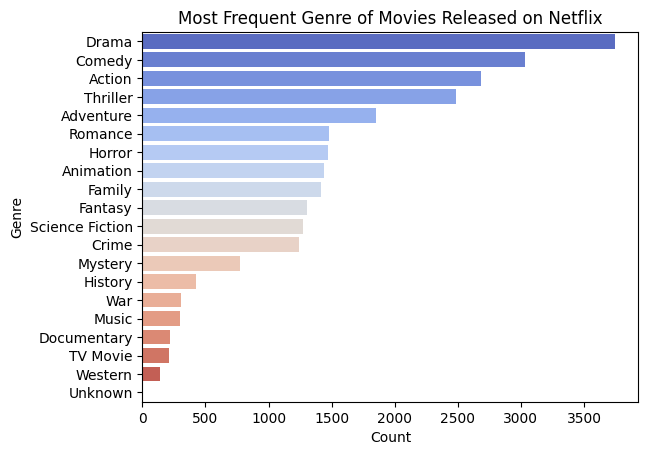

In [165]:
#  What is the most frequent genre of movies released on Netflix?

sns.countplot(y='Genre', data=df, order=df['Genre'].value_counts().index, palette='coolwarm')
plt.title('Most Frequent Genre of Movies Released on Netflix')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()


Conclusion:-From the above Countplot graph we find out that Drama  genre is the most frequent genre in our dataset and has appeared more than14% of the times among 19 other genres

C:\Users\patha\AppData\Local\Temp\ipykernel_12880\3125624879.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Genre', y='Vote_Average', data=df, palette='viridis')


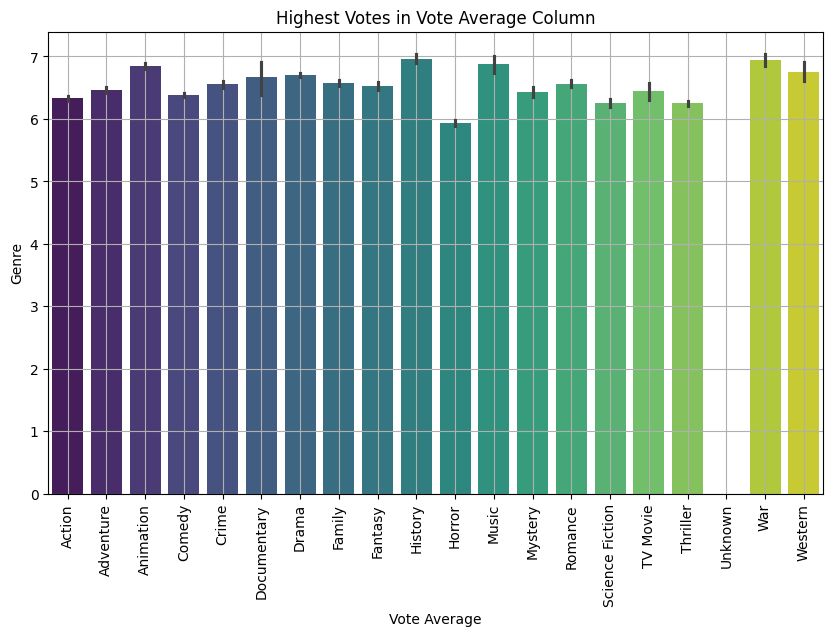

In [172]:
# Which has highest votes in vote avg column?

plt.figure(figsize=(10, 6))
sns.barplot(x='Genre', y='Vote_Average', data=df, palette='viridis')
plt.title('Highest Votes in Vote Average Column')
plt.xlabel('Vote Average')
plt.xticks(rotation=90)
plt.ylabel('Genre')
plt.grid()



In [178]:
# What movie got the highest popularity? what's its genre?
highestpopular=df[df['Popularity'] == df['Popularity'].max()]
print(highestpopular)
print('\n---------------------------------------------------------------')
print("\n\nThe movie with the highest popularity is:",highestpopular['Title'].values[0])
print("The genre of the movie is:", highestpopular['Genre'])


  Release_Date                    Title  Popularity  Vote_Count  Vote_Average  \
0   2021-12-15  Spider-Man: No Way Home    5083.954      8940.0           8.3   
1   2021-12-15  Spider-Man: No Way Home    5083.954      8940.0           8.3   
2   2021-12-15  Spider-Man: No Way Home    5083.954      8940.0           8.3   

  Original_Language            Genre  Year  
0                en           Action  2021  
1                en        Adventure  2021  
2                en  Science Fiction  2021  

---------------------------------------------------------------


The movie with the highest popularity is: Spider-Man: No Way Home
The genre of the movie is: 0             Action
1          Adventure
2    Science Fiction
Name: Genre, dtype: category
Categories (20, object): ['Action', 'Adventure', 'Animation', 'Comedy', ..., 'Thriller', 'Unknown', 'War', 'Western']


Conclusion:-Fron above table we can see that Spider-Man: No Way Home  has the highest popularity rate in our dataset and it has genres of  Action , Adventure  and  Sience Fiction .

In [177]:
# What movie got the Lowest popularity? what's its genre?

Lowest_popularity=df[df['Popularity']==df['Popularity'].min()]
print(Lowest_popularity)
print('\n---------------------------------------------------------------')
print("\n\nThe movie with the lowest popularity is:", df[df['Popularity'] == df['Popularity'].min()]['Title'].values[0])
print("The genre of the movie is:", df[df['Popularity'] == df['Popularity'].min()]['Genre'].values[0])


     Release_Date                  Title  Popularity  Vote_Count  \
3134   2013-10-20  Pixie Hollow Bake Off         0.0         0.0   
3135   1900-01-01                Unknown         0.0         0.0   

      Vote_Average Original_Language    Genre  Year  
3134           0.0           Unknown  Unknown  2013  
3135           0.0           Unknown  Unknown  1900  

---------------------------------------------------------------


The movie with the lowest popularity is: Pixie Hollow Bake Off
The genre of the movie is: Unknown


Conclusion:-Fron above table we can see that  Pixie Hollow Bake Off has the Lowest popularity rate in our dataset and it has genres of Unknown

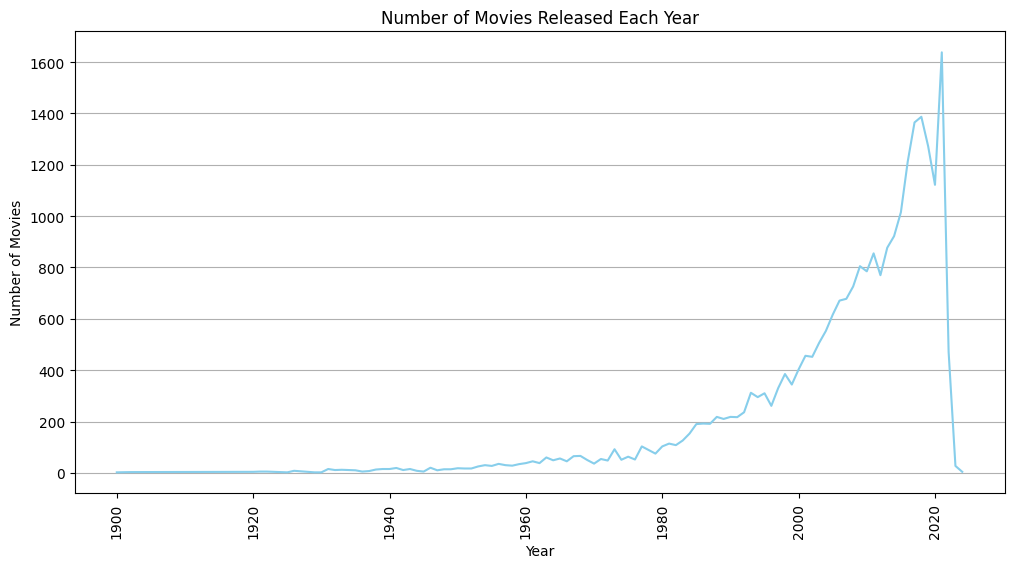

In [169]:
# Which year has the most filmmed movies?

df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')
df['Year'] = df['Release_Date'].dt.year
df['Year'].value_counts().sort_index().plot(kind='line', figsize=(12, 6), color='skyblue')
plt.title('Number of Movies Released Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()


Conclusion:-From above line graph we can see that year  2020  has the highest filmming rate in our dataset.